In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import numpy as np



In [3]:
stds_outcome = [np.float64(7.90744969929552e-08), np.float64(0.06324876222445988), np.float64(0.08751116417799366), np.float64(0.08358571603162346), np.float64(0.06723547234368464), np.float64(0.054227470505710765), np.float64(0.06624099797328371), np.float64(0.07030428424593649), np.float64(0.06847206578796096), np.float64(0.07206366204030934), np.float64(0.07232393986701532),np.float32(0.07013079),np.float32(0.065956764),np.float32(0.08077383),np.float32(0.07904749),np.float32(0.07924137),np.float32(0.08135524),np.float32(0.084762596),np.float32(0.0770485),np.float32(0.0770485)]
stabilities_outcome =     [np.float64(1.0000000476837159), np.float64(0.8139648079872132), np.float64(0.743798166513443), np.float64(0.7506123587489129), np.float64(0.8547571456432342), np.float64(0.883488906423251), np.float64(0.8104176197733199), np.float64(0.8083538025617599), np.float64(0.814953491754002), np.float64(0.7912942570447921), np.float64(0.7902835187586871), np.float32(0.8081768), np.float32(0.8085638),np.float32(0.7973471),np.float32(0.77543074),np.float32(0.7718826),np.float32(0.77074856),np.float32(0.7691384),np.float32(0.7549943),np.float32(0.77289224)]

In [4]:
stabilities_choice = [np.float32(0.9999999), np.float32(0.8097582), np.float32(0.8157333), np.float32(0.8784998), np.float32(0.84880847), np.float32(0.8711731), np.float32(0.8439263), np.float32(0.8016529), np.float32(0.7860315), np.float32(0.83166254), np.float32(0.8200697), np.float32(0.78326505),np.float32(0.82336557), np.float32(0.7898948), np.float32(0.7597017), np.float32(0.7903883),np.float32(0.7884027),np.float32(0.7635076),np.float32(0.7644658), np.float32(0.7576516)]
stds_choice = [np.float32(1.6539617e-07), np.float32(0.06432933), np.float32(0.10009774), np.float32(0.0689417), np.float32(0.06026641), np.float32(0.05383313), np.float32(0.06147888), np.float32(0.07426054), np.float32(0.07740889), np.float32(0.06120524), np.float32(0.06404661), np.float32(0.074482925),np.float32(0.06196541), np.float32(0.073730305), np.float32(0.082241066), np.float32(0.07226028),np.float32(0.07432013),np.float32(0.08291024),np.float32(0.08242734), np.float32(0.08306678)]

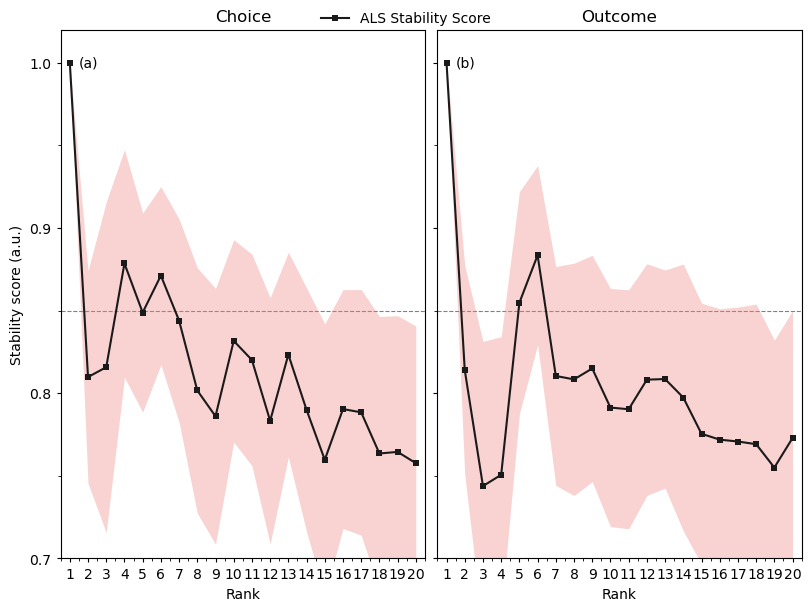

In [8]:




ranks = np.arange(1, 21)

fig, ax = plt.subplots(
    1, 2, figsize=(8, 6),
    sharey=True, constrained_layout=True
)

def panel(a, y, yerr, title, panel_label):
    # Uncertainty as a band 
    a.fill_between(
        ranks, y - yerr, y + yerr,
        color="lightcoral", alpha=0.35, linewidth=0, zorder=1
    )

    # Mean line + markers
    a.plot(
        ranks, y, "s-",
        color="0.1",
        markersize=4,
        markerfacecolor="0.1",
        markeredgewidth=0,
        zorder=2,
        label="ALS Stability Score"
    )

    # Reference line 
    a.axhline(0.85, color="0.5", ls="--", lw=0.8, zorder=0)

    # Axes formatting
    a.set_title(title)
    a.set_xlim(0.5, 20.5)
    a.set_xticks(ranks)
    a.tick_params(direction="out", length=3, width=0.8)
    a.tick_params(which="minor", direction="out", length=2, width=0.6)

    # Minor ticks without clutter
    a.xaxis.set_minor_locator(AutoMinorLocator(2))
    a.yaxis.set_minor_locator(AutoMinorLocator(2))
    a.yaxis.set_major_locator(MultipleLocator(0.1))

    # Panel label
    a.text(0.05, 0.95, panel_label, transform=a.transAxes,
           va="top", ha="left")

panel(ax[0], np.asarray(stabilities_choice), np.asarray(stds_choice),
      "Choice", "(a)")
panel(ax[1], np.asarray(stabilities_outcome), np.asarray(stds_outcome),
      "Outcome", "(b)")

ax[0].set_ylabel("Stability score (a.u.)")
for a in ax:
    a.set_xlabel("Rank")


ax[0].set_ylim(0.7, 1.02)

# One shared legend
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=1, frameon=False)

# Save as vector for publication
#plt.savefig("cp_rank_stability.pdf", bbox_inches="tight")
#plt.savefig("cp_rank_stability.png", dpi=300, bbox_inches="tight")
plt.show()
